In [1]:
import sys
assert sys.version_info >= (3, 7)

In [5]:
import sklearn
assert sklearn.__version__ >= "1.0.1"

In [6]:
import numpy as np

np.random.seed(42)

In [7]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

test = pd.read_csv('https://raw.githubusercontent.com/hhiyul/2025_machinerunning/refs/heads/main/test.csv')
train = pd.read_csv('https://raw.githubusercontent.com/hhiyul/2025_machinerunning/refs/heads/main/train.csv')
PassengerId = pd.read_csv('https://raw.githubusercontent.com/hhiyul/2025_machinerunning/refs/heads/main/gender_submission.csv')

여기서 PassengerId는 이미 test와 train에 있으니 사용 안함

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId = 승객번호, Survived = 생존여부(1=생존, 0=사망), Pclass = 객실등급

일단 승객번호 의미없고

성별, 객실등급, SibSp(형재자매배우), cabin까지?

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


test = 훈련 데이터셋, train = 걍 데이터값

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [13]:
IMAGES_PATH = Path() / "images" / "end_to_end_project" # 이미지 파일 저장 디렉토리 지정
IMAGES_PATH.mkdir(parents=True, exist_ok=True)         # 디렉토리 생성

In [14]:
train['Survived'][train['Sex']=='male'].value_counts()

Survived
0    468
1    109
Name: count, dtype: int64

In [15]:
train['Survived'][train['Sex']=='female'].value_counts()

Survived
1    233
0     81
Name: count, dtype: int64

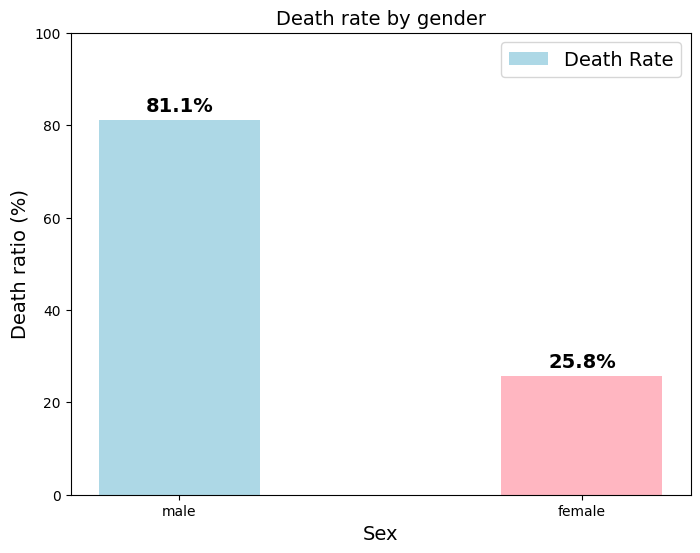

In [16]:
import matplotlib.pyplot as plt

# 남/여 전체 수 구하기
total_counts = train['Sex'].value_counts()

# 남/여 사망자 수 구하기
death_counts = train[train['Survived'] == 0]['Sex'].value_counts()

# NaN 값(사망자가 없는 경우) 처리 → 0으로 채우기
death_counts = death_counts.reindex(total_counts.index, fill_value=0)

# 사망자 비율 계산
death_ratio = death_counts / total_counts * 100

# 세로 막대 그래프 그리기
plt.figure(figsize=(8, 6))
pbars = plt.bar(total_counts.index, death_ratio, color=['lightblue', 'lightpink'], width=0.4)  # 막대 두께 조정

# 각 막대 끝에 비율 텍스트 추가
for bar in pbars:
    height = bar.get_height()  # 막대의 높이(사망자 비율)
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')

# y축 범위를 0에서 100으로 설정
plt.ylim(0, 100)

# 라벨 & 제목 추가
plt.xlabel("Sex")
plt.ylabel("Death ratio (%)")
plt.title("Death rate by gender")
plt.legend(["Death Rate"], loc="upper right")  # 범례 추가

# 그래프 출력
plt.show()


In [17]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [18]:
survival_class_1 = train['Survived'][train['Pclass'] == 1].value_counts()

# Pclass 2에서 생존자와 사망자 수 계산
survival_class_2 = train['Survived'][train['Pclass'] == 2].value_counts()

# Pclass 3에서 생존자와 사망자 수 계산
survival_class_3 = train['Survived'][train['Pclass'] == 3].value_counts()

survival_class_3
survival_class_2
survival_class_1

Survived
1    136
0     80
Name: count, dtype: int64

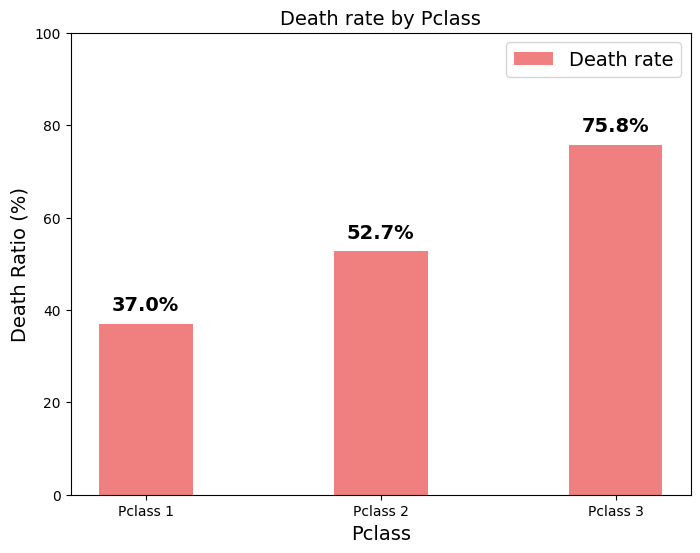

In [19]:
# Pclass별 전체 수
pclass_total_counts = train['Pclass'].value_counts()

# Pclass별 사망자 수 계산
pclass_deceased_counts = train[train['Survived'] == 0].groupby('Pclass').size()

# NaN 처리 (Pclass별 사망자 수가 없는 경우 0으로 채워짐)
pclass_deceased_counts = pclass_deceased_counts.reindex(pclass_total_counts.index, fill_value=0)

# 사망자 비율 계산
pclass_deceased_ratio = (pclass_deceased_counts / pclass_total_counts) * 100

# 그래프 그리기
fig, ax = plt.subplots(figsize=(8, 6))

# 사망자 비율 막대 그래프
ax.bar(pclass_total_counts.index, pclass_deceased_ratio, width=0.4, color='lightcoral', label='Death rate')

# 각 막대에 사망자 비율 텍스트 추가
for i in pclass_total_counts.index:
    deceased = pclass_deceased_counts[i]
    deceased_percent = pclass_deceased_ratio[i]
    ax.text(i, deceased_percent + 2, f'{deceased_percent:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')

plt.ylim(0, 100)

# 라벨 및 제목 설정
ax.set_xlabel("Pclass")
ax.set_ylabel("Death Ratio (%)")
ax.set_title("Death rate by Pclass")
ax.set_xticks(pclass_total_counts.index)
ax.set_xticklabels([f'Pclass {i}' for i in pclass_total_counts.index])
ax.legend()

# 그래프 출력
plt.show()


In [20]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

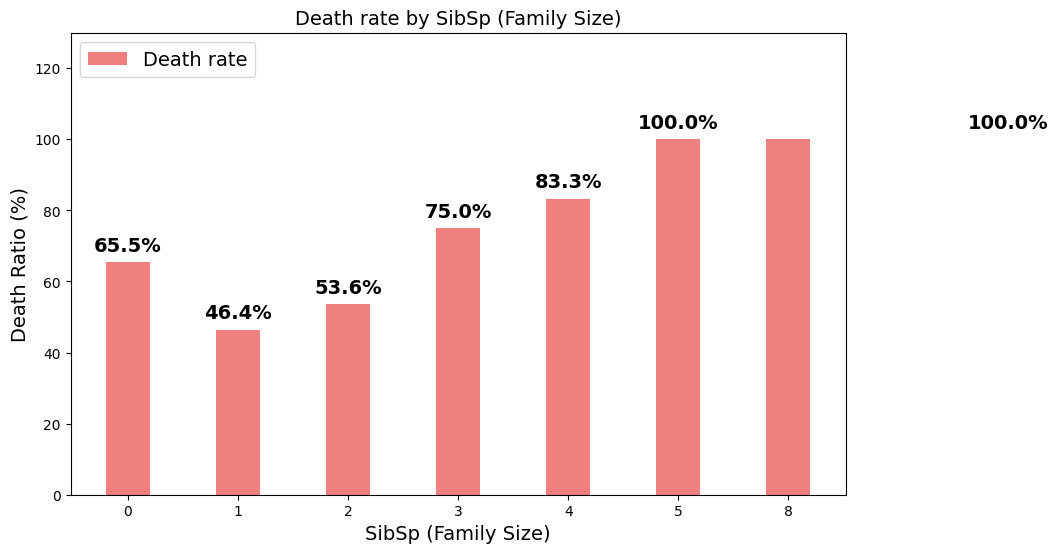

In [24]:
import matplotlib.pyplot as plt

# SibSp를 숫자형으로 변환
train['SibSp'] = train['SibSp'].astype(int)

# SibSp별 전체 수
SibSp_total_counts = train['SibSp'].value_counts().sort_index()

# SibSp별 사망자 수 계산
SibSp_deceased_counts = train[train['Survived'] == 0].groupby('SibSp').size()

# NaN 처리 (SibSp별 사망자 수가 없는 경우 0으로 채워짐)
SibSp_deceased_counts = SibSp_deceased_counts.reindex(SibSp_total_counts.index, fill_value=0)

# 사망자 비율 계산
SibSp_deceased_ratio = (SibSp_deceased_counts / SibSp_total_counts) * 100

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 사망자 비율 막대 그래프
ax.bar(SibSp_total_counts.index.astype(str), SibSp_deceased_ratio, width=0.4, color='lightcoral', label='Death rate')

# 각 막대에 사망자 비율 텍스트 추가
for i in SibSp_total_counts.index:
    deceased_percent = SibSp_deceased_ratio[i]
    ax.text(i, deceased_percent + 2, f'{deceased_percent:.1f}%', ha='center', va='bottom', color='black', fontweight='bold')

plt.ylim(0, 130)

# 라벨 및 제목 설정
ax.set_xlabel("SibSp (Family Size)")
ax.set_ylabel("Death Ratio (%)")
ax.set_title("Death rate by SibSp (Family Size)")
ax.legend(loc='upper left')

# 그래프 출력
plt.show()

#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래
#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래
#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래
#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래#시발 이거 왜이래

In [22]:
train['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

고로 